In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
titanic_data = pd.read_csv("titanic_train.csv")
titanic_data.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## EDA

<AxesSubplot:>

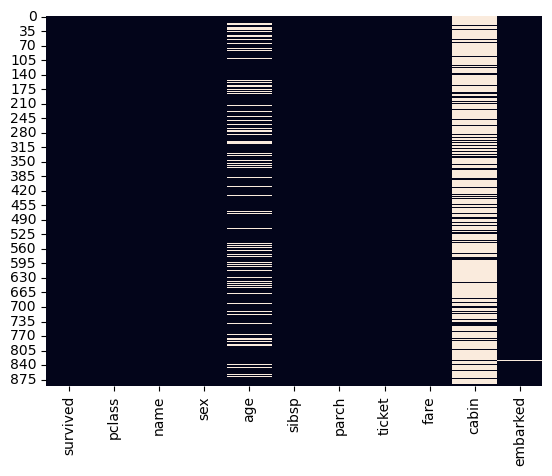

In [39]:
sns.heatmap(titanic_data.isnull(),cbar = False)

<AxesSubplot:xlabel='survived', ylabel='count'>

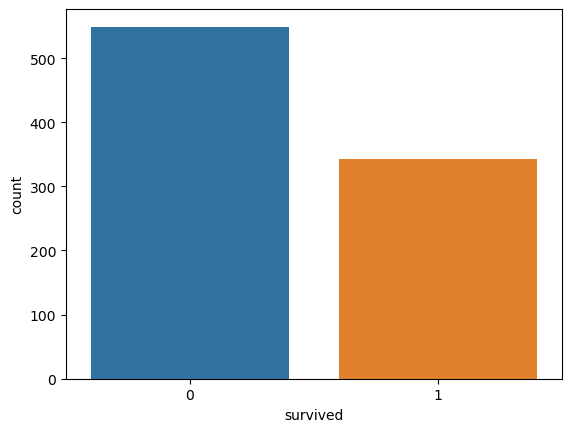

In [40]:
sns.countplot(x='survived', data=titanic_data)

<AxesSubplot:xlabel='survived', ylabel='count'>

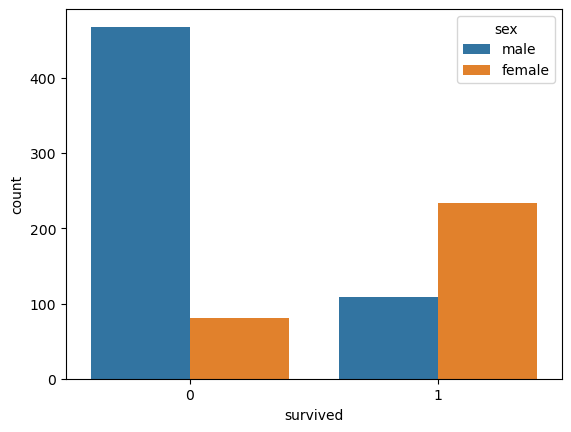

In [41]:
sns.countplot(x='survived', hue='sex', data=titanic_data)

<AxesSubplot:xlabel='survived', ylabel='count'>

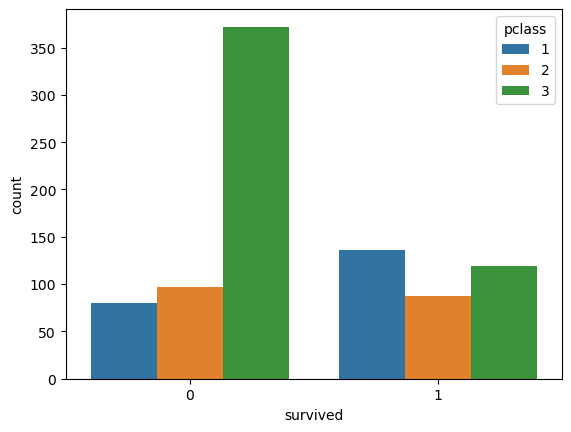

In [42]:
sns.countplot(x='survived', hue='pclass', data=titanic_data)

(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

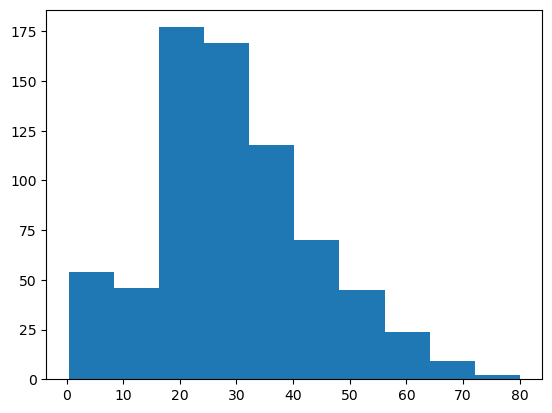

In [43]:
plt.hist(titanic_data['age'].dropna())

<AxesSubplot:xlabel='pclass', ylabel='age'>

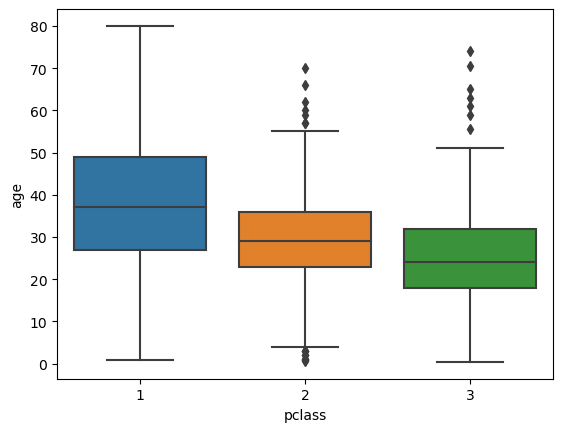

In [44]:
sns.boxplot(x=titanic_data['pclass'], y=titanic_data['age'])

In [17]:
def impute_missing_age(columns):
    age = columns[0]
    passenger_class = columns[1]
    if pd.isnull(age):
        if(passenger_class == 1):
            return titanic_data[titanic_data['pclass'] == 1]['age'].mean()
        elif(passenger_class == 2):
            return titanic_data[titanic_data['pclass'] == 2]['age'].mean()
        elif(passenger_class == 3):
            return titanic_data[titanic_data['pclass'] == 3]['age'].mean()
    else:
        return age
#Impute the missing Age data
titanic_data['age'] = titanic_data[['age', 'pclass']].apply(impute_missing_age,axis = 1)

<AxesSubplot:>

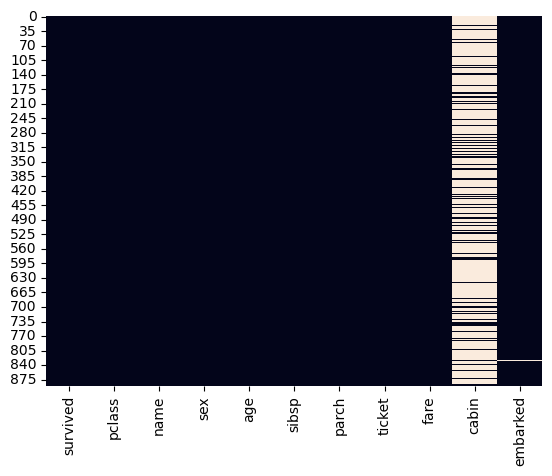

In [18]:
sns.heatmap(data=titanic_data.isnull(),cbar=False)

In [20]:
titanic_data.drop('cabin', axis=1, inplace = True)
titanic_data.dropna(inplace = True)

In [21]:
titanic_data['embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [22]:
sex = pd.get_dummies(titanic_data['sex'])
embarked = pd.get_dummies(titanic_data['embarked'])

In [23]:
titanic_data = pd.concat([titanic_data,sex,embarked],axis=1)

In [25]:
titanic_data.drop(['name', 'ticket', 'sex', 'embarked'], axis =1, inplace = True)

In [26]:
titanic_data = titanic_data.astype(int)

In [27]:
titanic_data

,survived,pclass,age,sibsp,parch,fare,female,male,C,Q,S
0,0,3,22,1,0,7,0,1,0,0,1
1,1,1,38,1,0,71,1,0,1,0,0
2,1,3,26,0,0,7,1,0,0,0,1
3,1,1,35,1,0,53,1,0,0,0,1
4,0,3,35,0,0,8,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27,0,0,13,0,1,0,0,1
887,1,1,19,0,0,30,1,0,0,0,1
888,0,3,25,1,2,23,1,0,0,0,1
889,1,1,26,0,0,30,0,1,1,0,0


In [28]:
X = titanic_data.drop('survived',axis=1)
y = titanic_data['survived']

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size = 0.3)

### model

In [34]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)

model.fit(X_train, y_train)
predictions = model.predict(X_test)

### model evaluation

In [45]:
from sklearn.metrics import classification_report, confusion_matrix
#from sklearn.metrics import confusion_matrix

In [46]:
print("\n************Classification Report************\n")
print(classification_report(y_test, predictions))
print("\n***********Confusion Matrix***************\n")
print(confusion_matrix(y_test, predictions))


************Classification Report************

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       163
           1       0.77      0.67      0.72       104

    accuracy                           0.79       267
   macro avg       0.79      0.77      0.78       267
weighted avg       0.79      0.79      0.79       267


***********Confusion Matrix***************

[[142  21]
 [ 34  70]]
